In [1]:
import cv2
import requests # For reading image from URL
from google.colab.patches import cv2_imshow
import numpy as np
from PIL import Image
import numpy as np

def download_image_from_url(url):
    filename, ext = url.split("/")[-1].split(".")
    # Send an HTTP GET request to the URL
    response = requests.get(url)
    # Check if the request was successful (status code 200 indicates success)
    if response.status_code == 200:
        # Get the content of the response (the image data)
        image_data = response.content
        # Specify the path where you want to save the image
        save_path = f"{filename}.{ext}"  # Replace with the desired file name and location
        # Open a binary file in write mode and write the image data to it
        with open(save_path, "wb") as file:
            file.write(image_data)
        print(f"Image downloaded and saved as {save_path}")
        return cv2.imread(save_path)
    else:
        print(f"Failed to download the image. Status code: {response.status_code}")

In [2]:
def apply_custom_filter(image, kernel):
    # Convert the image to grayscale if it's a color image
    if len(image.shape) == 3:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image

    # Apply the custom filter using cv2.filter2D
    filtered_image = cv2.filter2D(gray_image, -1, kernel)

    return filtered_image

Image downloaded and saved as D.jpg


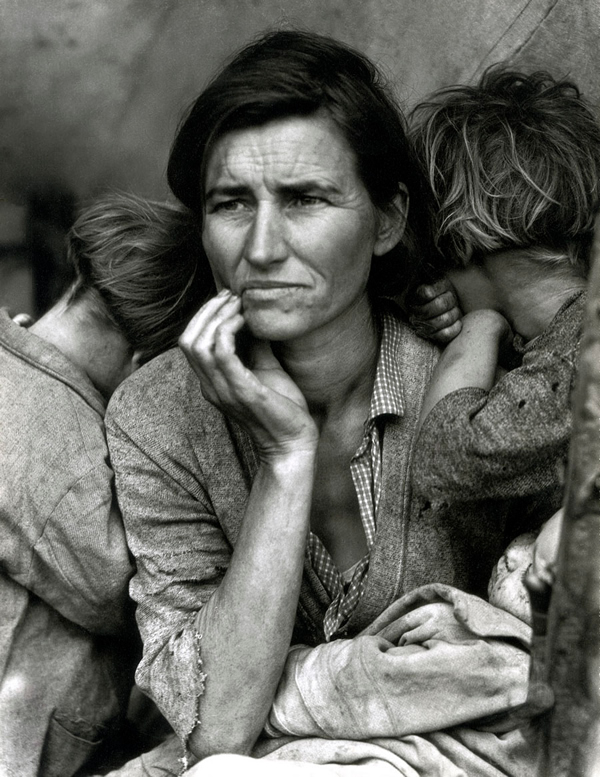

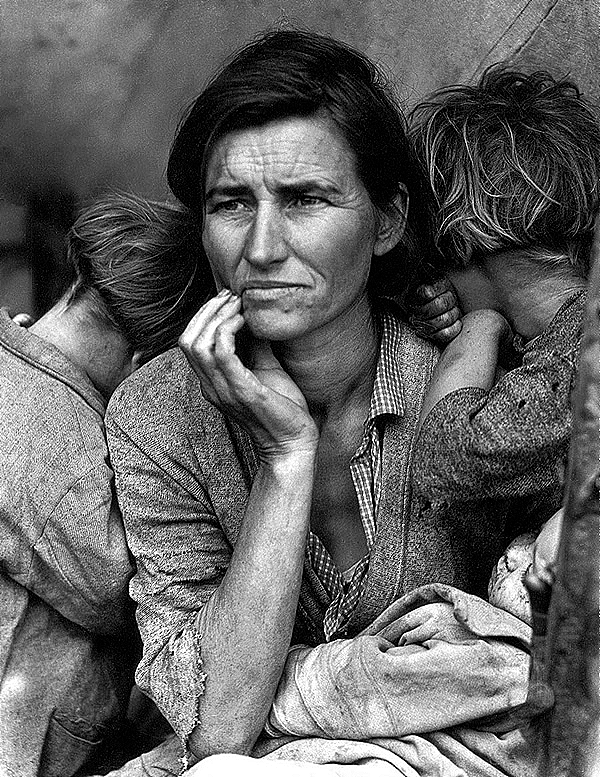

Before: 83, After: 84
Before: 80, After: 94
Before: 27, After: 147
Before: 127, After: 90
Before: 45, After: 233
Before: 156, After: 152
Before: 110, After: 67
Before: 85, After: 55
Before: 17, After: 142
Before: 11, After: 59


In [3]:
# Load the input image
download_image_from_url("https://i.ibb.co/QXQx81x/D.jpg")
original_image_path = '/content/D.jpg'
image = cv2.imread(original_image_path)

# Display the original image
cv2_imshow(image)

# Define the custom kernel
custom_kernel = np.array([[0, -1, 0],
                          [-1, 5, -1],
                          [0, -1, 0]])

# Apply the custom filter
filtered_image = apply_custom_filter(image, custom_kernel)

# Display the filtered image
cv2_imshow(filtered_image)

# Compare values before and after applying the filter for ten random pixels
random_pixels = np.random.randint(0, filtered_image.size, 10)
for pixel in random_pixels:
    print(f"Before: {image.flatten()[pixel]}, After: {filtered_image.flatten()[pixel]}")

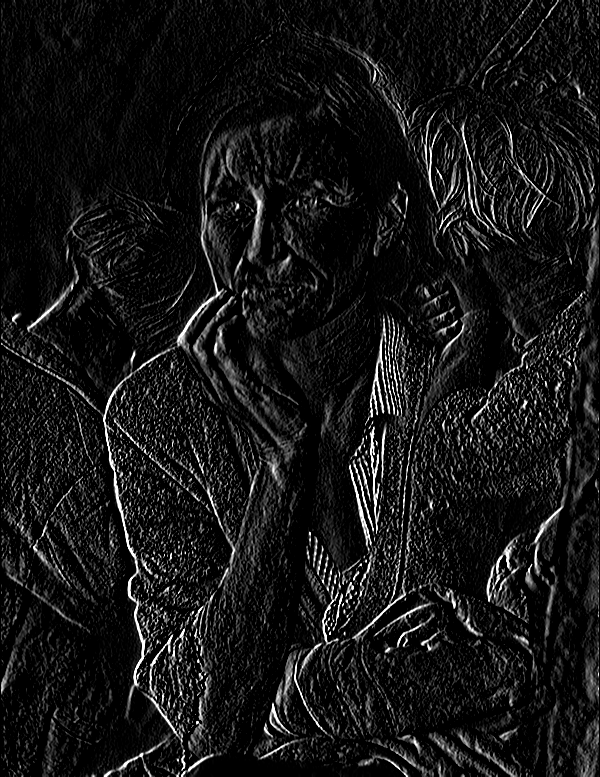

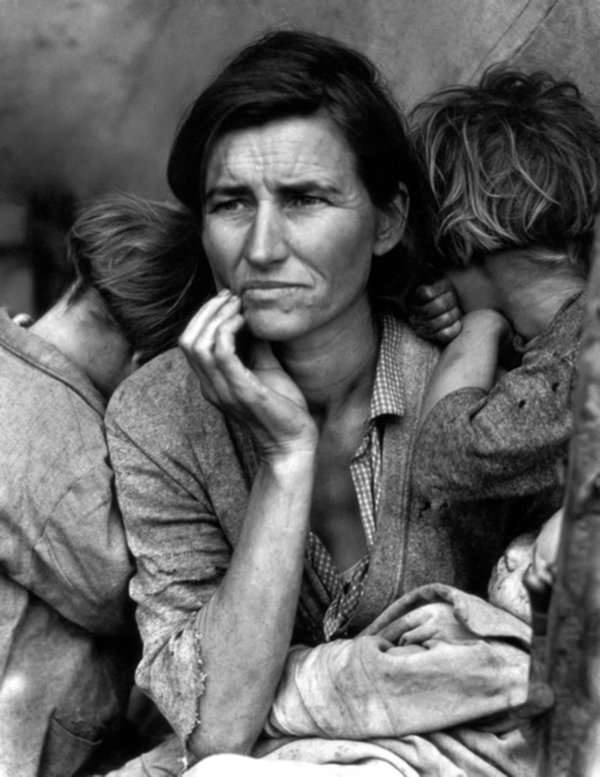

In [4]:
# Example of using the function with different kernels
# Define different kernels
sobel_x_kernel = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])

gaussian_blur_kernel = (1/16) * np.array([[1, 2, 1],
                                          [2, 4, 2],
                                          [1, 2, 1]])

# Apply Sobel X filter
sobel_x_filtered_image = apply_custom_filter(image, sobel_x_kernel)
cv2_imshow(sobel_x_filtered_image)

# Apply Gaussian blur filter
gaussian_blur_filtered_image = apply_custom_filter(image, gaussian_blur_kernel)
cv2_imshow(gaussian_blur_filtered_image)

In [5]:
def apply_custom_average_filter(image, filter_dimensions):
    # Convert the image to grayscale if it's a color image
    if len(image.shape) == 3:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image

    # Define the custom average filter kernel
    kernel_height, kernel_width = filter_dimensions
    kernel = np.ones((kernel_height, kernel_width), np.float32) / (kernel_height * kernel_width)

    # Apply the average filter using cv2.filter2D
    filtered_image = cv2.filter2D(gray_image, -1, kernel)

    return filtered_image

Image downloaded and saved as E.jpg


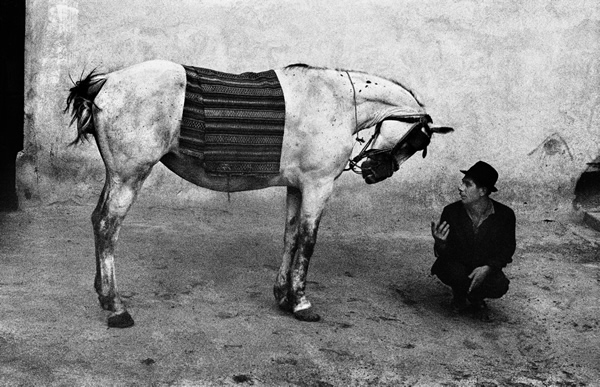

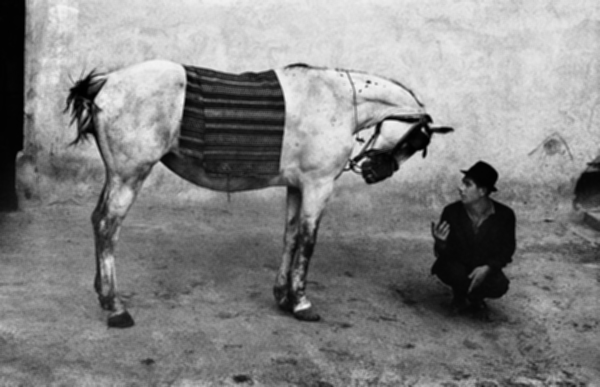

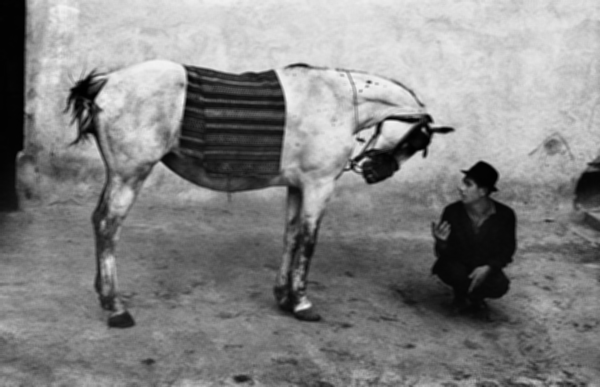

In [6]:
# Load the input image
download_image_from_url("https://i.ibb.co/sbtsv5z/E.jpg")
original_image_path = '/content/E.jpg'
image = cv2.imread(original_image_path)

# Display the original image
cv2_imshow(image)

# Apply custom average filter with a 3x3 kernel
custom_average_filtered_image_3x3 = apply_custom_average_filter(image, (3, 3))
cv2_imshow(custom_average_filtered_image_3x3)

# Apply custom average filter with a 3x4 kernel
custom_average_filtered_image_3x4 = apply_custom_average_filter(image, (3, 4))
cv2_imshow(custom_average_filtered_image_3x4)

Image downloaded and saved as F.jpg


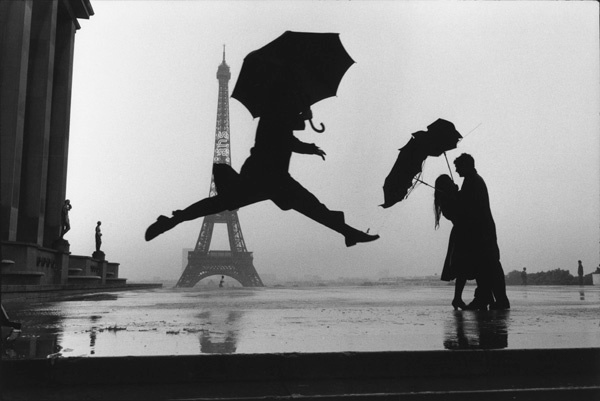

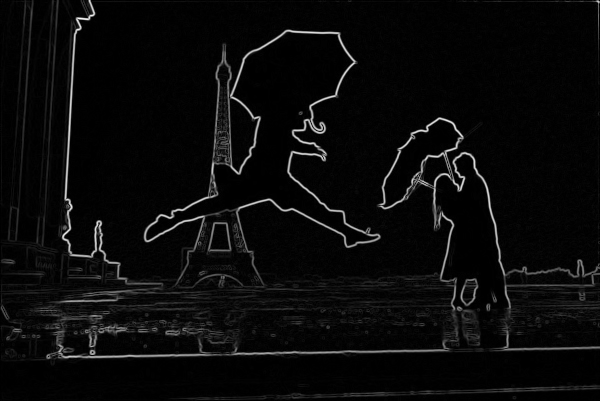

In [7]:
def sobel_edge_detection(image):
    # Convert the image to grayscale if it's a color image
    if len(image.shape) == 3:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image

    # Apply Sobel filter in the horizontal direction
    sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)

    # Apply Sobel filter in the vertical direction
    sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)

    # Combine the results to get the final edge-detected image
    sobel_edges = np.sqrt(sobel_x**2 + sobel_y**2)

    # Normalize the values to the range [0, 255]
    sobel_edges = np.uint8(255 * sobel_edges / np.max(sobel_edges))

    return sobel_edges

# Load the input image
download_image_from_url("https://i.ibb.co/KXZrVWz/F.jpg")
original_image_path = '/content/F.jpg'
image = cv2.imread(original_image_path)

# Display the original image
cv2_imshow(image)

# Apply Sobel edge detection
sobel_edges = sobel_edge_detection(image)
cv2_imshow(sobel_edges)
